In [20]:
import matplotlib.pyplot as plt
import csv
import math

Pokemons = []

with open("..\\Data\\datapoints.csv", newline='') as csvfile:
    reader = csv.DictReader(csvfile)

    for row in reader:
        width = float(row["(width (cm)"])
        height = float(row[" height (cm)"])
        label = int(row[" label (0-pichu"])
        
        Pokemons.append({"width": width, "height": height, "label": label})

for row in Pokemons:
    print(row)



{'width': 21.959384499160468, 'height': 31.23956701424158, 'label': 0}
{'width': 23.63591632187622, 'height': 36.46821490673444, 'label': 1}
{'width': 17.714056417303343, 'height': 31.44170391314962, 'label': 0}
{'width': 21.78020031891186, 'height': 33.213397759738264, 'label': 1}
{'width': 25.20630552859312, 'height': 36.558816149350534, 'label': 1}
{'width': 19.332572350434354, 'height': 32.25325633655492, 'label': 0}
{'width': 24.73645685241186, 'height': 35.33291181124776, 'label': 1}
{'width': 23.79257560586339, 'height': 38.10372825362463, 'label': 1}
{'width': 24.557612968127465, 'height': 36.73144402805611, 'label': 1}
{'width': 20.191281253428173, 'height': 35.06966921830237, 'label': 0}
{'width': 25.813562951888365, 'height': 35.561029988644336, 'label': 1}
{'width': 24.923378667802954, 'height': 34.463907946680294, 'label': 1}
{'width': 25.311244044578427, 'height': 34.117212558131975, 'label': 1}
{'width': 22.819091361866796, 'height': 34.25516433025548, 'label': 1}
{'widt

# Plottar datan

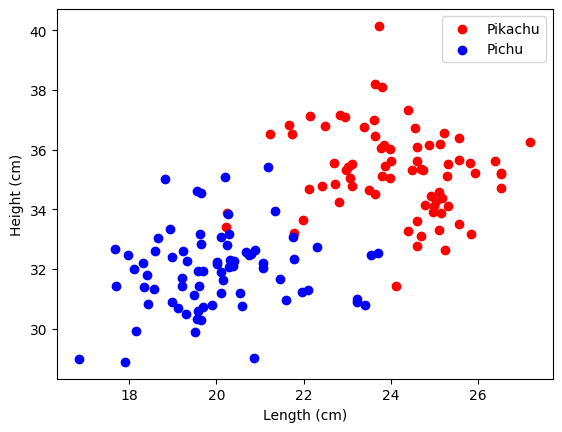

In [21]:
# Create empty lists for Pikachu and Pichu data
pikachu_data = []
pichu_data = []

try:
    # Read data from CSV file
    with open("..\\Data\\datapoints.csv", newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            try:
                length = float(row["(width (cm)"])
                height = float(row[" height (cm)"])
                label = int(row[" label (0-pichu"])
                data_point = {'Length': length, 'Height': height, 'Label': label}
                
                if label == 1:
                    pikachu_data.append(data_point)
                elif label == 0:
                    pichu_data.append(data_point)
            except ValueError:
                print(f"Skipping row with invalid data: {row}")
    
    # Data som jag skall plotta
    plt.scatter([point['Length'] for point in pikachu_data], [point['Height'] for point in pikachu_data], c='red', label='Pikachu')
    plt.scatter([point['Length'] for point in pichu_data], [point['Height'] for point in pichu_data], c='blue', label='Pichu')

    plt.xlabel('Length (cm)')
    plt.ylabel('Height (cm)')
    plt.legend()
    plt.show()

except FileNotFoundError:
    print("The 'datapoints.csv' file was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

# Beräkna punkternas avstånd, punkten är närmast?


In [22]:
# Funktion för att läsa in datapunkter från en CSV-fil
def read_csv(filename):
    Pokemons = []

    with open(filename, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            width = float(row["(width (cm)"])
            height = float(row[" height (cm)"])
            label = int(row[" label (0-pichu"])
        
            Pokemons.append({'width': width, 'height': height, 'label': label})

    return Pokemons

Pokemons = read_csv("..\\Data\\datapoints.csv")

test_data = []

with open("..\\Data\\testpoints.csv", newline='') as file:
    lines = file.readlines()

lines = lines[1:]

def extract_values(line):
    coordinates_start = line.find('(') + 1
    coordinates_end = line.find(')')
    coordinates_str = line[coordinates_start:coordinates_end]

    width_str, height_str = coordinates_str.split(',')
    width = float(width_str.strip())
    height = float(height_str.strip())

    label_start = line.find('classified as') + len('classified as')
    label = line[label_start:].strip()

    return width, height, label

for line in lines:
    width, height, label = extract_values(line)
    test_point = {'Width': width, 'Height': height, 'Label': label}
    test_data.append(test_point)

for test_point in test_data:
    min_distance = float('inf')  # Initialt sätt avståndet till oändlighet
    nearest_class = None

    for point in Pokemons:
        width_diff = test_point['Width'] - point['width']
        height_diff = test_point['Height'] - point['height']
        distance = math.sqrt(width_diff ** 2 + height_diff ** 2)

        if distance < min_distance:
            min_distance = distance
            nearest_class = "Pikachu" if point['label'] == 1 else "Pichu"

    # Skriv ut resultatet för varje testpunkt
    print(f"Testpunkt ({test_point['Width']}, {test_point['Height']}) är närmast {nearest_class}")


Testpunkt (25.0, 32.0) är närmast Pikachu
Testpunkt (24.2, 31.5) är närmast Pikachu
Testpunkt (22.0, 34.0) är närmast Pikachu
Testpunkt (20.5, 34.0) är närmast Pichu


# 1. 
Låt användaren mata in en testpunkt och låt algoritmen avgöra dess klass. Ta med felhanteringen
som tar hand om negativa tal och icke-numeriska inputs. Se till att ha användarvänliga felmeddelanden

In [23]:
def read_csv(filename):
    Pokemons = []

    with open(filename, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            width = float(row["(width (cm)"])
            height = float(row[" height (cm)"])
            label = int(row[" label (0-pichu"])
        
            Pokemons.append({'width': width, 'height': height, 'label': label})

    return Pokemons

Pokemons = read_csv("..\\Data\\datapoints.csv")

test_data = []

with open("..\\Data\\testpoints.csv", newline='') as file:
    lines = file.readlines()

# Hoppa över den första raden med rubriker
lines = lines[1:]

for line in lines:
    # Använd slicing för att extrahera värden
    coordinates_start = line.find('(') + 1
    coordinates_end = line.find(')')
    coordinates_str = line[coordinates_start:coordinates_end]

    width, height = map(float, coordinates_str.split(','))

    label_start = line.find('classified as') + len('classified as')
    label = line[label_start:].strip()

    test_point = {'Width': width, 'Height': height, 'Label': label}
    test_data.append(test_point)

def input_test_point():
    while True:
        try:
            width = float(input("Ange bredden (cm) för testpunkten: "))
            height = float(input("Ange höjden (cm) för testpunkten: "))
            return {'Width': width, 'Height': height}
        except ValueError:
            print("Felaktig inmatning. Vänligen ange numeriska värden för bredd och höjd.")

def classify_test_point(test_point):
    min_distance = float('inf')  # Initialt sätt avståndet till oändlighet
    nearest_class = None

    for point in Pokemons:
        width_diff = test_point['Width'] - point['width']
        height_diff = test_point['Height'] - point['height']
        distance = math.sqrt(width_diff ** 2 + height_diff ** 2)

        if distance < min_distance:
            min_distance = distance
            nearest_class = "Pikachu" if point['label'] == 1 else "Pichu"

    return nearest_class

while True:
    print("===================================")
    print("Välkommen till Pokémon-klassificering")
    print("===================================")

    test_point = input_test_point()
    nearest_class = classify_test_point(test_point)

    print(f"Testpunkt ({test_point['Width']}, {test_point['Height']}) är närmast {nearest_class}")

    try:
        choice = input("Vill du testa en annan punkt? (ja/nej): ").lower()
        if choice != 'ja':
            break
    except KeyboardInterrupt:
        break


Välkommen till Pokémon-klassificering
Testpunkt (25.0, 35.0) är närmast Pikachu
Välkommen till Pokémon-klassificering
Testpunkt (23.0, 29.0) är närmast Pichu
Välkommen till Pokémon-klassificering
Testpunkt (27.0, 33.0) är närmast Pikachu


# 2
Den approachen vi använt med närmaste punkten kan klassificera fel när punkterna för respektive
klass går in i varandra. Nu ska du istället välja de tio närmaste punkterna till din testpunkt. Den klass
testpunkten tillhör avgörs av majoritetsröstning av de närmaste punkterna.

In [24]:
def classify_test_point(test_point):
    distances = []

    for point in Pokemons:
        width_diff = test_point['Width'] - point['width']
        height_diff = test_point['Height'] - point['height']
        distance = math.sqrt(width_diff ** 2 + height_diff ** 2)
        distances.append((point, distance))

    # Sortera punkterna efter avstånd
    sorted_distances = sorted(distances, key=lambda x: x[1])

    # Välj de tio närmaste punkterna
    nearest_points = sorted_distances[:10]

    # Räkna majoritetsklassen
    pikachu_count = sum(1 for point, _ in nearest_points if point['label'] == 1)
    pichu_count = 10 - pikachu_count

    if pikachu_count > pichu_count:
        return "Pikachu"
    else:
        return "Pichu"

# Huvudprogrammet
while True:
    print("===================================")
    print("Välkommen till Pokémon-klassificering")
    print("===================================")

    test_point = input_test_point()
    nearest_class = classify_test_point(test_point)

    print(f"Testpunkt ({test_point['Width']}, {test_point['Height']}) klassificeras som {nearest_class}")

    try:
        choice = input("Vill du testa en annan punkt? (ja/nej): ").lower()
        if choice != 'ja':
            break
    except KeyboardInterrupt:
        break


Välkommen till Pokémon-klassificering
Testpunkt (23.0, 33.0) klassificeras som Pichu
